## Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline

In [2]:
from xgboost import XGBClassifier

## Data loading

In [4]:
df=pd.read_csv('Ad Click Data.csv')
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


## EDA

In [5]:
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [7]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


Text(0.5, 0, 'age')

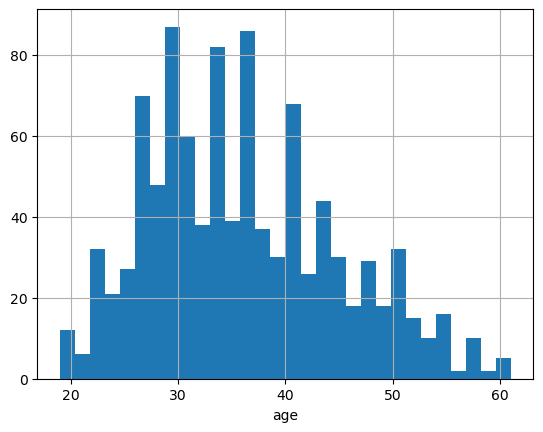

In [9]:
df['Age'].hist(bins=30)
plt.xlabel('age')

In [10]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])

<Axes: xlabel='hour', ylabel='clicks_hour'>

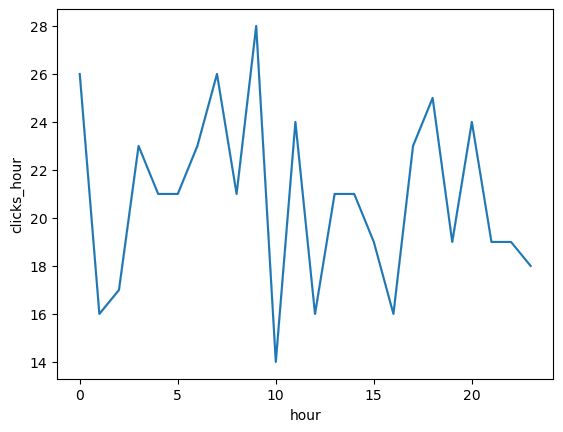

In [11]:
df['hour']=df.Timestamp.apply(lambda x: x.hour)
df['clicks_hour']=df.groupby('hour')['Clicked on Ad'].transform('sum')
sns.lineplot(x='hour', y='clicks_hour', data=df)

<Axes: xlabel='day', ylabel='clicks_day'>

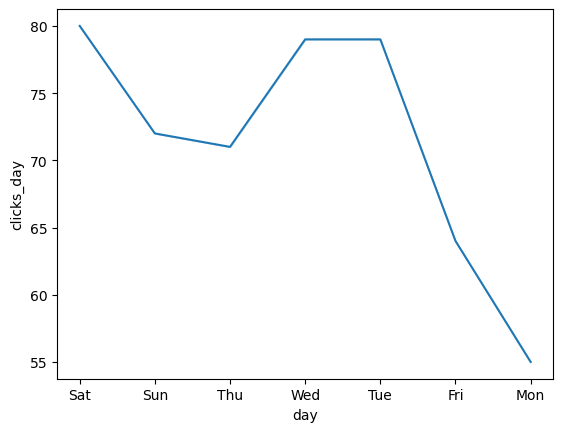

In [17]:
df['day']=df.Timestamp.apply(lambda x: x.day_of_week)
df['clicks_day']=df.groupby('day')['Clicked on Ad'].transform('sum')
l=df['day'].map({0: 'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
sns.lineplot(x=l, y=df['clicks_day'])

<Axes: xlabel='Age', ylabel='Area Income'>

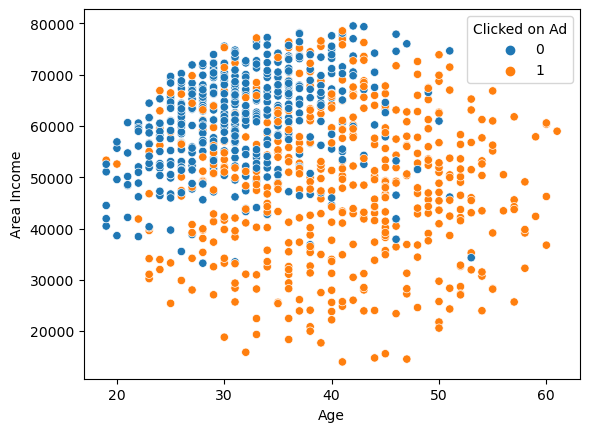

In [18]:
sns.scatterplot(x='Age', y='Area Income', hue='Clicked on Ad', data=df)

<Axes: xlabel='Age', ylabel='Daily Time Spent on Site'>

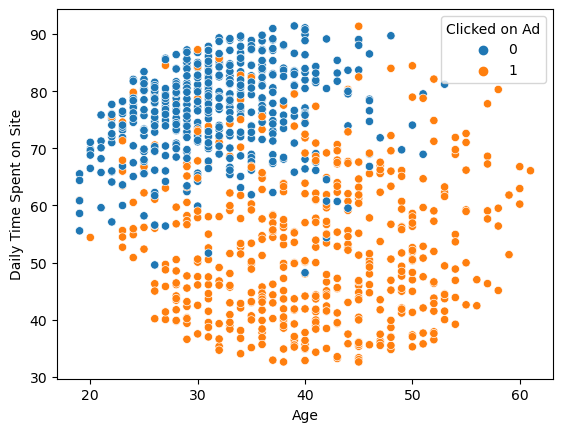

In [20]:
sns.scatterplot(x='Age', y='Daily Time Spent on Site', hue='Clicked on Ad', data=df)

<Axes: xlabel='Daily Internet Usage', ylabel='Daily Time Spent on Site'>

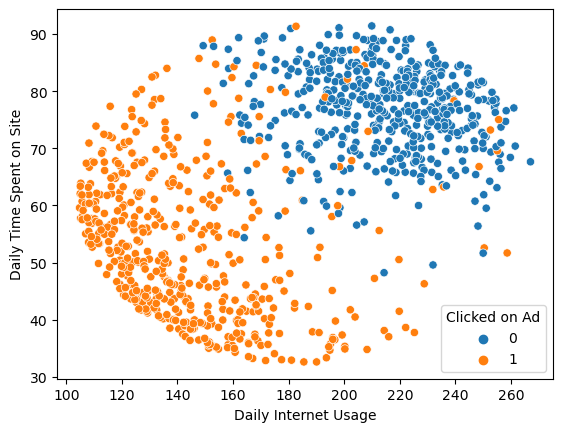

In [21]:
sns.scatterplot(x='Daily Internet Usage', y='Daily Time Spent on Site', hue='Clicked on Ad', data=df)

In [28]:
df.dropna(inplace=True)

<Axes: xlabel='Male', ylabel='count'>

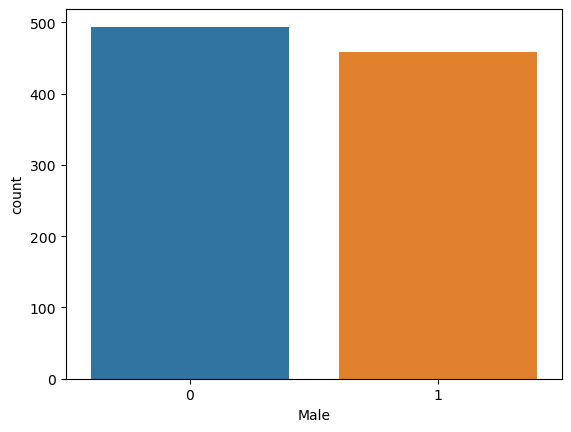

In [29]:
df['Male']=df['Male'].astype(int)
sns.countplot(x=df['Male'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


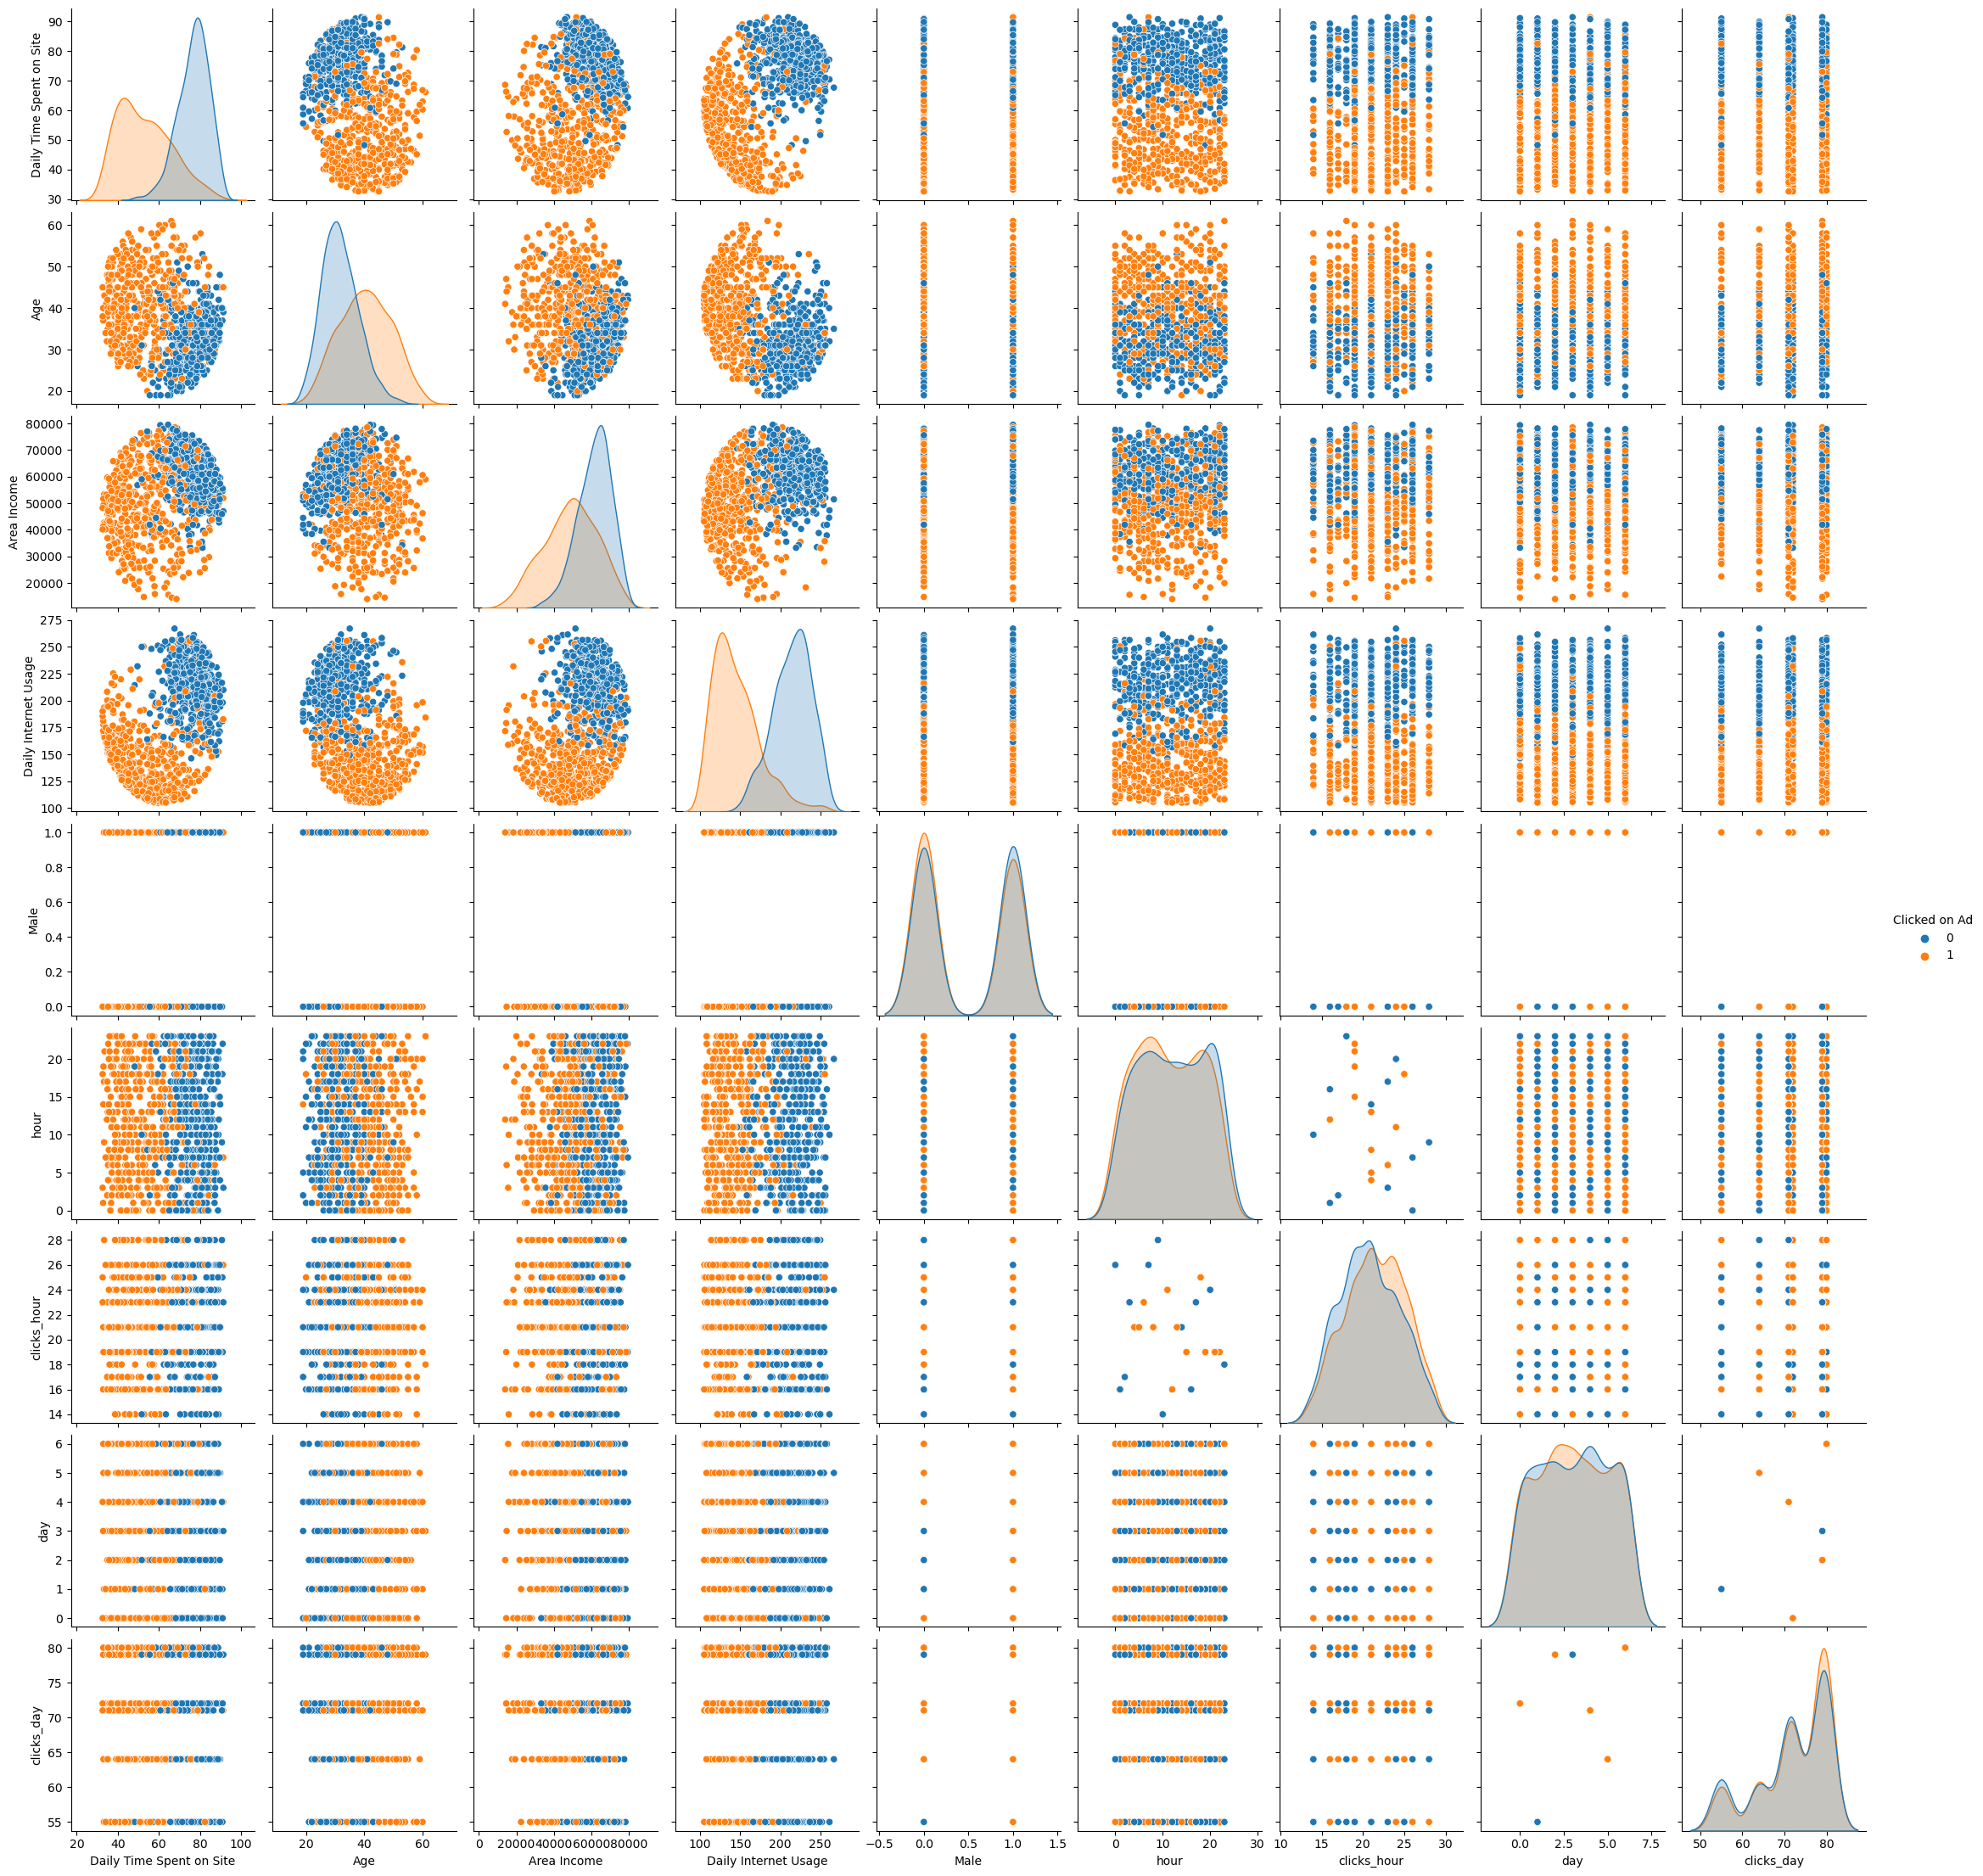

In [31]:
sns.pairplot(x=df,hue='Clicked on Ad')

## Data preprocessing

In [32]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'hour', 'clicks_hour', 'day',
       'clicks_day'],
      dtype='object')

In [35]:
X=df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y=df['Clicked on Ad']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
scale=MinMaxScaler()
X_train= scale.fit_transform(X_train)
X_test= scale.fit_transform(X_test)

## Logistic Regression

In [38]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
lg=accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       148
           1       0.97      0.98      0.97       138

    accuracy                           0.98       286
   macro avg       0.98      0.98      0.98       286
weighted avg       0.98      0.98      0.98       286

[[144   4]
 [  3 135]]
0.9755244755244755


## Random Forest

In [40]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred= rf.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
rfs=accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       148
           1       0.94      0.97      0.96       138

    accuracy                           0.96       286
   macro avg       0.96      0.96      0.96       286
weighted avg       0.96      0.96      0.96       286

[[140   8]
 [  4 134]]
0.958041958041958


## XGBoost

In [42]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
xgbs=accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       148
           1       0.92      0.98      0.95       138

    accuracy                           0.95       286
   macro avg       0.95      0.95      0.95       286
weighted avg       0.95      0.95      0.95       286

[[137  11]
 [  3 135]]
0.951048951048951


## SVM

In [45]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
svcs=accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       148
           1       0.96      0.98      0.97       138

    accuracy                           0.97       286
   macro avg       0.97      0.97      0.97       286
weighted avg       0.97      0.97      0.97       286

[[143   5]
 [  3 135]]
0.972027972027972


## Model Comparison

,Model,Accuracy Score
0,Logistic Regression,0.975524
3,SVC,0.972028
1,Random Forest,0.958042
2,XGBoost,0.951049


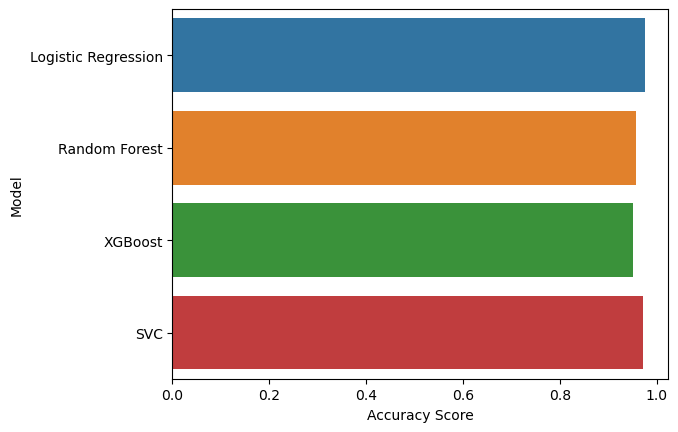

In [51]:
models = pd.DataFrame({
    'Model':['Logistic Regression','Random Forest','XGBoost','SVC'],
    'Accuracy Score':[lg,rfs,xgbs,svcs]
})
sns.barplot(x='Accuracy Score',y='Model',data=models)
models.sort_values(by='Accuracy Score',ascending= False)